In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
bg = '#11134A'
txt = '#FAF9F1'
rosso = '#E48484'

mpl.rcParams['text.color'] = txt
mpl.rcParams['axes.labelcolor'] = txt
mpl.rcParams['xtick.color'] = txt
mpl.rcParams['ytick.color'] = txt
mpl.rcParams['axes.facecolor'] = bg
mpl.rcParams['axes.edgecolor'] = txt

In [3]:
marriage = pd.read_csv( '../../data/marriage.csv' )

In [4]:
year = marriage['Time'][0]
marriage = marriage.drop( columns = ['Time'] )
marriage = marriage.drop( marriage[marriage['Rito'] == 'tutte le voci'].index )
marriage = marriage.drop( marriage[marriage['Territorio'] == 'comuni non capoluogo'].index )
marriage = marriage.groupby( by = 'Territorio' )
# print(marriage.head(1))
# print(year)

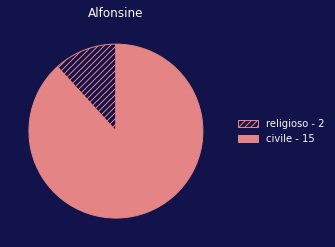

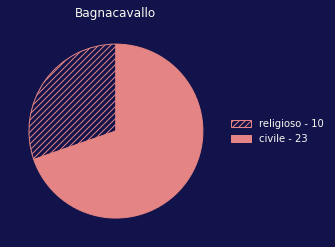

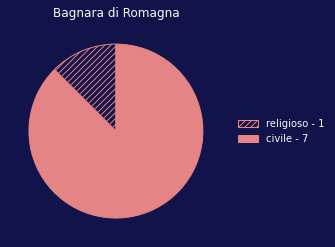

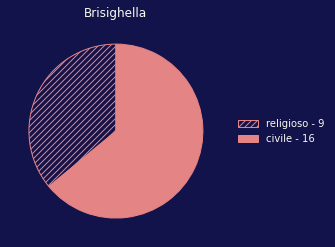

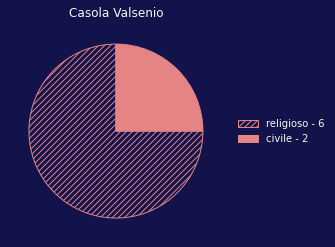

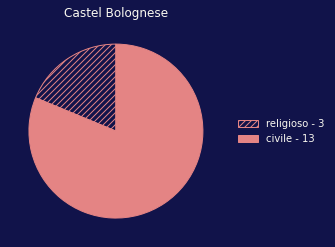

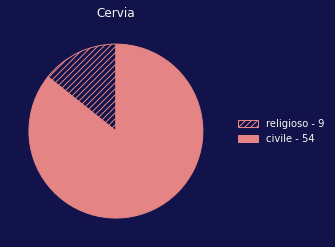

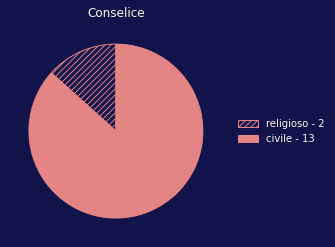

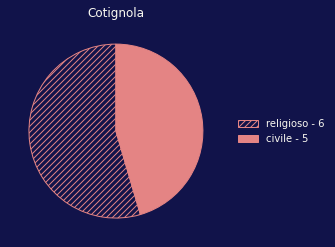

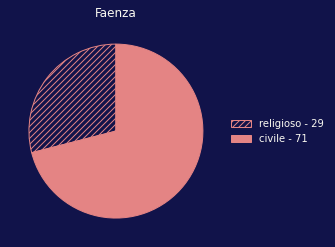

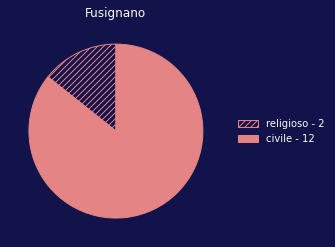

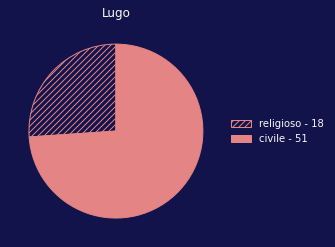

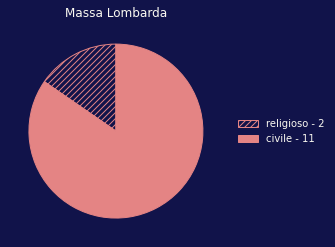

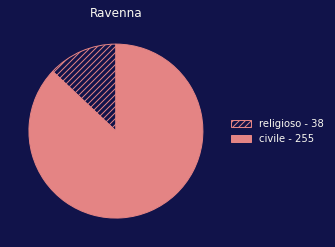

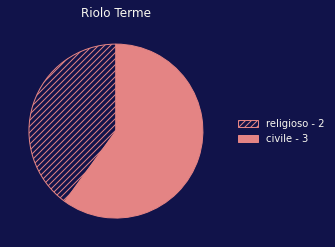

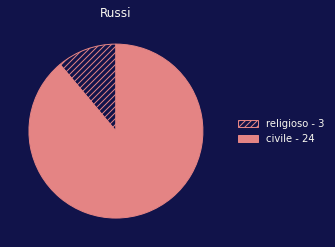

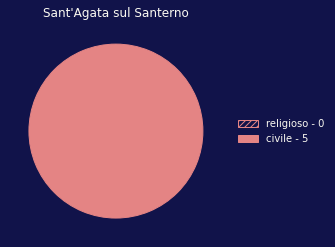

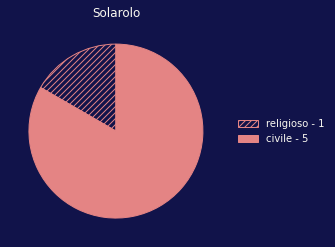

In [5]:
def distr_analysis(df, str):
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('w') # to save with left click, not needed with plt.savefig
    piechart = plt.pie(df['Value'], 
                   startangle = 90,
                   wedgeprops = {'edgecolor' : rosso,
                                 'facecolor': 'none'}
                )
    piechart[0][0].set_hatch("////")
    piechart[0][1].set_color(rosso)
    plt.title(str)
    labels_concat = df['Rito'] + ' - ' + df['Value'].astype('string')
    plt.legend(piechart[0], 
               labels_concat.array, 
               bbox_to_anchor = (1.5, 0.5), 
               loc = 'center right', 
               frameon = False 
              )
    fig.patch.set_facecolor(bg)
    plt.show()
    return

for name, group in marriage:
    distr_analysis( group, name )